==== Breast Cancer Dataset ====
Features: mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension
Targets: malignant, benign

Dataset Entropy: 0.9526

Information Gain (using median split):
  mean radius: 0.3416
  mean texture: 0.1445
  mean perimeter: 0.3507
  mean area: 0.3416
  mean smoothness: 0.0660
  mean compactness: 0.2325
  mean concavity: 0.3695
  mean concave points: 0.3995
  mean symmetry: 0.0627
  mean fractal dimension: 0.0000
  radius error: 0.1824
  texture error: 0.0000
  perimeter error: 0.2192
  area error: 0.2910
  s

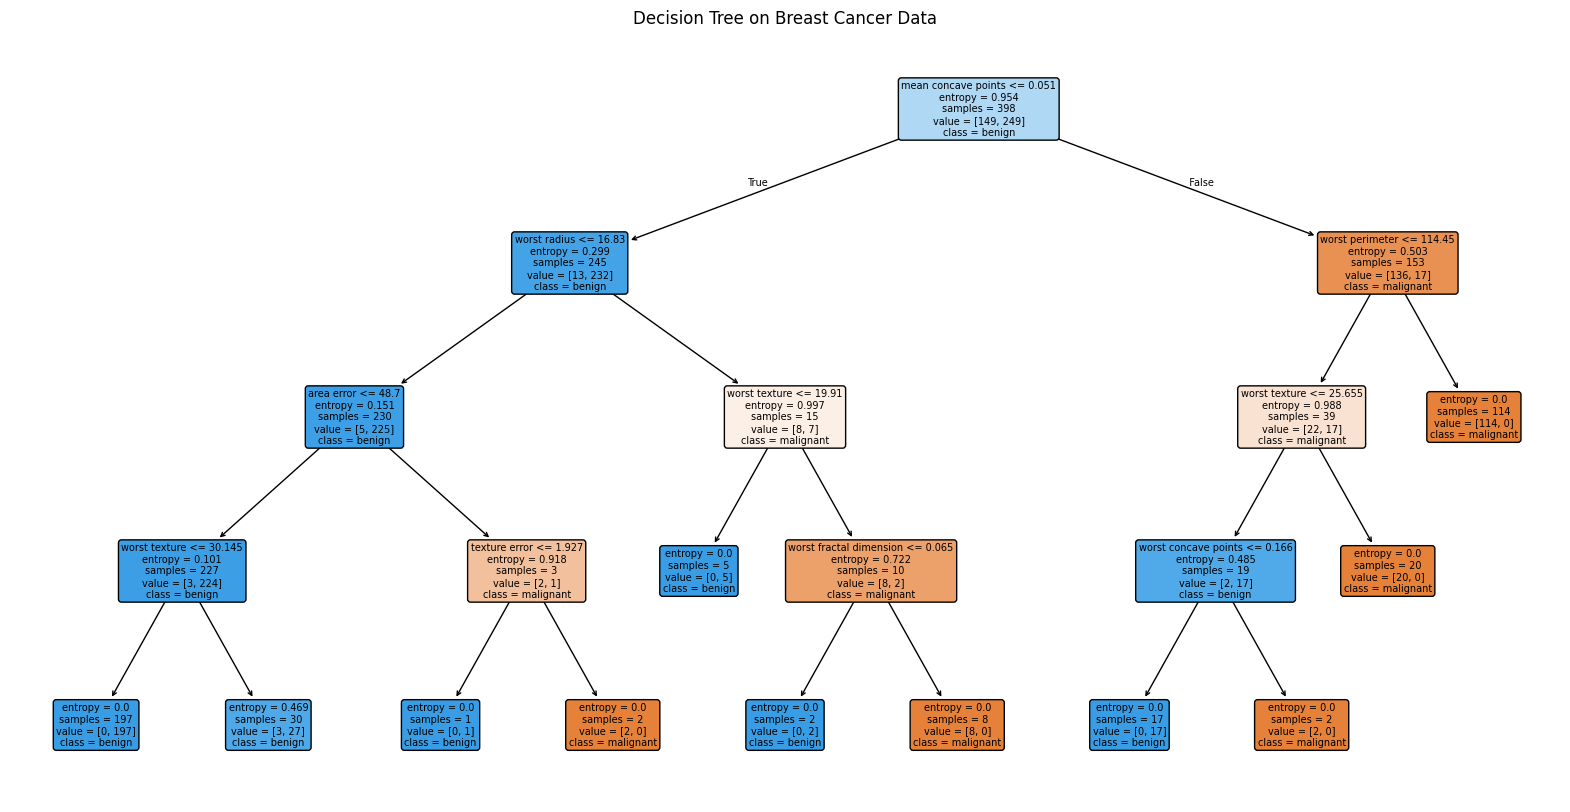

==== New Prediction for Random Sample ====
Predicted Class: benign


In [3]:
#Develop a program to demonstrate the working of the decision tree algorithm. Use Breast Cancer Data set for building the decision tree and apply this knowledge to classify a new sample. 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter

# Load dataset
data = load_breast_cancer()
x = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("==== Breast Cancer Dataset ====")
print("Features:", ", ".join(feature_names))
print("Targets:", ", ".join(target_names))
print()

# Entropy calculation
def calculate_entropy(labels):
    total = len(labels)
    counts = Counter(labels)
    entropy = 0.0
    for count in counts.values():
        p = count / total
        entropy -= p * np.log2(p)
    return entropy

# Dataset entropy
entropy_dataset = calculate_entropy(y)
print(f"Dataset Entropy: {entropy_dataset:.4f}\n")

# Information Gain for each feature (splitting at median)
print("Information Gain (using median split):")
for i, feature in enumerate(feature_names):
    feature_values = x[:, i]
    median_value = np.median(feature_values)
    left_mask = feature_values <= median_value
    right_mask = feature_values > median_value
    y_left = y[left_mask]
    y_right = y[right_mask]
    entropy_left = calculate_entropy(y_left)
    entropy_right = calculate_entropy(y_right)
    weighted_entropy = (len(y_left) / len(y)) * entropy_left + (len(y_right) / len(y)) * entropy_right
    info_gain = entropy_dataset - weighted_entropy
    print(f"  {feature}: {info_gain:.4f}")
print()

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(x_train, y_train)

# Prediction & Evaluation
y_pred = clf.predict(x_test)
print("==== Decision Tree Classification Report ====")
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}\n")

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=feature_names, class_names=target_names, rounded=True, filled=True)
plt.title("Decision Tree on Breast Cancer Data")
plt.show()

# Classify new sample (random values for demonstration)
random_sample = np.random.normal(loc=0, scale=1, size=(1, x.shape[1]))
prediction = clf.predict(random_sample)
print("==== New Prediction for Random Sample ====")
print(f"Predicted Class: {target_names[prediction[0]]}")